# MDIBL Transcriptome Assembly Learning Module
# Notebook 0: Background Material

## Welcome!

This is a series of notebooks that allows you to explore the biological and computational process of the transcriptome assembly. Through these notebooks, you will also learn to leverage the powerful capabilities of tools such as Nextflow and Google Life Science API to bring your computational capabilities to the next level!

Before you get started, please take this prerequisite that checks existing knowledge that will be assumed to be known through the rest of these workbooks.

Throughout the notebooks, there will be periodic quizzes and knowledge checks that you are encouraged to do.

Good luck, and have fun!

<div class="alert alert-block alert-warning">
    <i class="fa fa-pencil" aria-hidden="true"></i>
    <b>Precheck:</b>
</div>

>Before you get started, please take this quick quiz that will verify some baseline knowledge on the ideas of DNA, RNA, Transcription, and Gene Expression.

In [1]:
# This is an install that you need to run once to allow the quizes to be functional.
!pip install jupyterquiz==2.0.7
!pip install jupytercards

In [2]:
from jupyterquiz import display_quiz

In [3]:
display_quiz("quiz-material/00-pc1.json")

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success">
    <i class="fa fa-hand-paper-o" aria-hidden="true"></i>
    <b>Note: </b>  Some Resources
</div>

>If you feel unsure about your knowledge in any of these topics, please reference [Submodule_00_Glossary.md](./Submodule_00_Glossary.md) along with the National Human Genome Research Institute's [Glossary of Genomic and Genetic Terms](https://www.genome.gov/genetics-glossary).

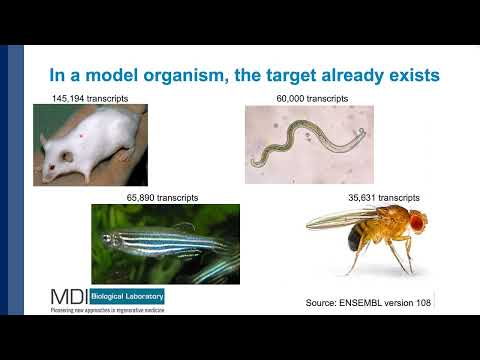

In [4]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('abw2XAg1e_g', width=800, height=400)

## Why do we sequence RNA?
RNA-sequencing (RNA-seq) is the most common means by which biological samples are characterized at the molecular level.  In brief, it is a means of measuring which genes have RNA copies (transcripts) present in a sample and in what relative abundance. The sample is prepared in such a way that DNA and proteins are degraded away, and then the remaining RNA is prepared such that it can be read (as a series of DNA bases A, C, G, and T) on a modern sequencer. Sequencing machines are generally classified as short read, which produces sequence read lengths of 50 to 150 nucleotides, or long-read, which can generate up to tens of thousands of bases. Short-read sequencers have been available for a longer time, and remain more capable of high throughput quantitative output, and these reads are the focus of our work here.

The standard workflow analysis of RNA-seq data consists of these broad steps:
- Quality assessment and pre-processing
- Assignment of reads to transcripts/genes
- Normalization of reads between samples
- Assessment of differential expression of transcripts/genes between experimental conditions
- Interpretation of the resulting differential expression profiles

Implicit in the workflow above is the existence of a target transcriptome to which the RNA-seq reads can be compared, aligned, and assigned for quantification. For well-studied organisms, such as human, mouse, zebrafish, or other model organisms, there are abundant reference materials available from such sites as [Ensembl](https://www.ensembl.org/), [NCBI](https://ncbi.nlm.nih.gov/), and the [UCSC Genome Browser](https://genome.ucsc.edu/).

For less well-studied organisms, no such references are generally available, however, the RNA-seq data contains the information necessary to infer not only abundance but also the transcript sequences from which the data was generated. The process of inferring the starting transcripts from the data, termed ***Transcriptome Assembly***, is the focus of this module.

## Transcriptome Sequence Assembly
As a first approximation, sequence assembly of a single molecule (*e.g.*, a chromosome) can be thought of as analogous to the process of reconstructing a picture from smaller, overlapping segments of the picture. Overlapping pieces are identified and matched, extending the construct until an estimation of the complete picture is generated. To make this metaphor a bit more realistic, the subsegments of the original picture are *imperfect*, such that successful construction of the complete picture will require error identification (or at least estimation) and correction.

In order to extend this analog to transcriptome assembly, imagine that instead of one picture, our smaller segments instead are drawn from many pictures. Now the process of reconstruction will necessarily include a step that attempts to separate the smaller segments into related groups, after which the assembly procedure proceeds.

#### Preprocessing and Data Cleaning
For reasons described below, stringent quality assessment and filtering of the data is generally carried out before the assembly process is begun. The primary steps include:
- Removal of low-quality score data
- Removal of contaminant sequence data
- Removal of known functional RNA

#### Sequence Assembly
<img  src="images/deBruijnGraph.png" width=600 alt="Conceptual design of a de Bruijn Graph">

**Figure 1:** Conceptual diagram of a sequence-defined [de Bruijn graph](https://en.wikipedia.org/wiki/De_Bruijn_graph). (A) Each sequence in an RNA-seq is broken into overlapping *k*-mers. (B) Each *k*-mer becomes a node in the graph, shown in the example with *k*=6. Edges are drawn between nodes that match *k*-1 contiguous nucleotides. (C) Putative transcripts (shown in distinct colors) are represented as traversals of one of the many connected components of the graph generated by the starting sequence set.</p>

#### Assembly Assessment
- Internal consistency
    - Use of a de Bruijn graph is computationally efficient (especially compared to exhaustive pairwise alignment of all sequence reads), but all "long-range" information is weakened.
    - The weakening of the long-range information necessitates further QC. The problem is that building complete transcripts from just *k*-mers and their probabilities means that we can generate sequences that are computationally possible but don't exist in the input data. Internal consistency refers to the process of aligning the original input reads to the output transcriptome. Transcripts that do not get sufficient coverage are flagged as probable artifacts.
- External consistency
    - Studies of transcriptomes across many organisms have demonstrated common features. By "external consistency" we mean matching our new transcriptome to these expectations.
    - [BUSCO](https://busco.ezlab.org/) is an innovative analysis and set of tools developed by the [EZlab at the Swiss Insitute of Bioinformatics](https://www.ezlab.org/). The fundamental idea behind BUSCO (**B**enchmarking **U**niversal **S**ingle-**C**opy **O**rthologs) derives from the Zdobnov group's analysis, which showed that for a defined phylogenetic range of organisms, there is a core set of protein-coding genes that are nearly universally present in only a single copy. The BUSCO tools test this assumption.
    - The second standard process for external consistency is to align all predicted proteins for the new transcriptome to a complete set of proteins from a well-studied (e.g., fly or mouse) under the assumption that most of the proteins should match.

#### Assembly Refinement
Assemblies are refined in several different manners:
- Removal of redundant (or likely so) transcripts, based on sequence similarity between assembled forms.
- Limitation to transcripts with predicted/conceptual translated protein sequences that match known proteins in other organisms.

For Assembly refinement, the TransPi workflow relies primarily on the "EvidentialGene" tool.

## Workflow Execution with Nextflow

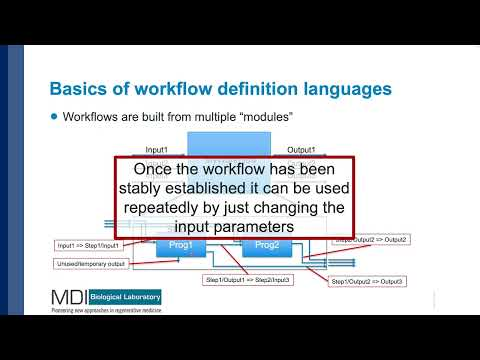

In [5]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('FMcZD10Qrbs', width=800, height=400)


It is standard practice in modern biotechnology, bioinformatics, and computational biology that most complex analyses are carried out not by a single comprehensive program, but are instead carried out in a defined sequence of multiple programs. The process of running through these steps in the proper order is collectively called a ***workflow*** or ***pipeline***.

<img align="right" src="images/workflow_concept.png" width=400>

Workflow management systems, *e.g.*, Nextflow, provide a syntax for defining the order of steps and the associated flow of information between steps, while also providing management/control software that can read and carry out these workflows. The workflow control systems (which are generally platform-specific) are responsible for allocating resources, activating analysis steps, and also making sure that all steps occur in the proper order (e.g., only activating a sequence alignment program after the sequence quality control has been performed).

<img align="left" src="images/module_concept.png" width=250>

Workflows can be conceptually broken up into steps or modules (see the figure at left), which formalize the flow of information as inputs and outputs. A workflow conceptually ties the steps/modules together and enforces the dependencies (see the figure above), specifically in that if the output from one step is the input for a later step, the later step is blocked until the earlier step completes.

## Running Individual Analysis Steps with Docker
One of the most frustrating aspects of carrying out computational biology/bioinformatics programs is installing and maintaining the software programs that we use. These programs are built by a wide variety of research and industrial organizations, and they are built on a wide variety of platforms and utilize an even wider set of supporting libraries and auxiliary components. The reason this causes problems is that the underlying dependencies can conflict with those of other programs or the operating system.

One of our primary tools for efficient maintenance is a container system such as [Docker](https://www.docker.com/).
#### What are container systems and what are containers?
A container system is a program that creates protected environments within your computer in which programs and their dependencies can be loaded only as long as they are needed to run the program of interest. The container system can load and unload containers as needed. One of the primary benefits of such systems is that once a container has been defined for a specific program, it can be reused repeatedly on the same computer or shared with others through online repositories.
#### Why do we use containers?
We use containers because they allow us to run a broad range of computer programs without having to manage all of their underlying programmatic dependencies. Having a program encapsulated in a container also preserves our ability to continue to use that version of the program, even if either the program or its dependencies are updated.

## Running workflows using the Google Cloud Life Sciences API
The [Google Cloud Life Sciences API (GLS)](https://cloud.google.com/life-sciences) is a service provided by Google that both understands workflows and also controls, including activation, program execution, and deactivation of Google Cloud computing servers.

#### What do we gain by using GLS
- The key to cost-efficient cloud computing is to only use the resources you need for as long as you need them. 
- GLS allows us to control our process from a modest, inexpensive machine that can interface with GLS to provision and use the more expensive machines needed for computing.
- GLS explicitly supports the Nextflow workflow system that we are using, mapping computational tasks onto GCP computing resources.

<div class="alert alert-block alert-warning">
    <i class="fa fa-pencil" aria-hidden="true"></i>
    <b>Checkpoint 1:</b>
</div>

In [6]:
display_quiz("quiz-material/00-cp1.json", shuffle_questions = True)

<IPython.core.display.Javascript object>

## Jupyter Notebook Introduction

All of the content contained within this module is presented in Jupyter notebooks which have the `.ipynb` file type. *You are in a Jupyter notebook right now.* Within each notebook is a series of cells that can be individually executed by pressing the `shift + enter` keys at the same time.

Each cell has options as to how it is executed. For example, the text that you are reading right now in this cell is in the `Markdown` cell type, but there are also `code`, and `raw` cell types. In these modules, you will primarily be seeing `Markdown` and `code` cells. *You can choose what each cell type is by using the drop-down menu at the top of the notebook.*

> <img src="images/cellMenu.png" width="500">

For the code cells, information carries over between cells, but in execution order. This is important because when looking at a series of cells you may be expecting a specific output, but receive a different output due to the order of execution.

<div class="alert alert-block alert-warning">
    <i class="fa fa-pencil" aria-hidden="true"></i>
    <b>Example:</b> Follow the steps in the cells below
</div>

In [7]:
# Execute 1st:
var1 = 100

In [8]:
# Execute 2nd and 4th:
print(var1)

100


In [9]:
# Execute 3rd:
var1 = 'not the same anymore'
# And now run the cell above

>As you can see, `var1` got overwritten, and when you retroactively re-run the `print(var1)` cell, the output has changed, even though it is above the variable assignment.

In the following notebooks, there will be some code cells that will take a long time to run. *Sometimes with no output.* So there are two ways to check if the cell is still executing:

1. The first way to check is to look to the left of the code cell. There will be an indication that looks like this: `[ ]:` If it is empty, then the cell has never been executed yet. If it looks like this: `[*]:`, that means that it is actively executing. And if it looks like this `[53]:`, that means that it has completed executing.
2. The second way, which will check to see if anything in the entire notebook is executing is in the top right of the notebook (Image Below). If the circle is empty, then nothing is actively executing. If the circle is grayed out, then there is something executing.

> <img src="images/jupyterRuntimeCircle.png" width="500">

<div class="alert alert-block alert-warning">
    <i class="fa fa-pencil" aria-hidden="true"></i>
    <b>Knowledge Check:</b> 
</div>

>Change the cell below from a code cell to a markdown cell. *Don't forget to execute the cell.*

In [10]:
change our cell type
# I WANT TO BE BIGGER
*I want to be tilted*

**I want to be bold**

`And I want to have a grey background`

SyntaxError: invalid syntax (3245504772.py, line 1)

<div class="alert alert-block alert-warning">
    <i class="fa fa-pencil" aria-hidden="true"></i>
    <b>Checkpoint 2:</b>
</div>

In [ ]:
display_quiz("quiz-material/00-cp2.json", shuffle_questions = True)

<div class="alert alert-block alert-warning">
    <i class="fa fa-pencil" aria-hidden="true"></i>
    <b>Glossary:</b> 
</div>

> Within the the file [`Submodule_00_glossary.md`](./Submodule_00_Glossary.md) you will find a compilation of useful terms that will be beneficial to refer to throughout the rest of the learning module.

## When you are ready, proceed to the next notebook: [`Submodule_01_prog_setup.ipynb`](./Submodule_01_prog_setup.ipynb).